### 인공지능과 기계학습 2주차 과제
IT공학전공 2012375 김단

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 1. 데이터 불러오기

titanic = sns.load_dataset('titanic')
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
# 여기서 결측치 제거도 가능
# titanic = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']].dropna()

In [3]:
# 2. 데이터 훑어보기

print(titanic.info())
print(titanic.describe())
print(titanic['survived'].value_counts()) # 타겟값 클래스 개수 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB
None
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      

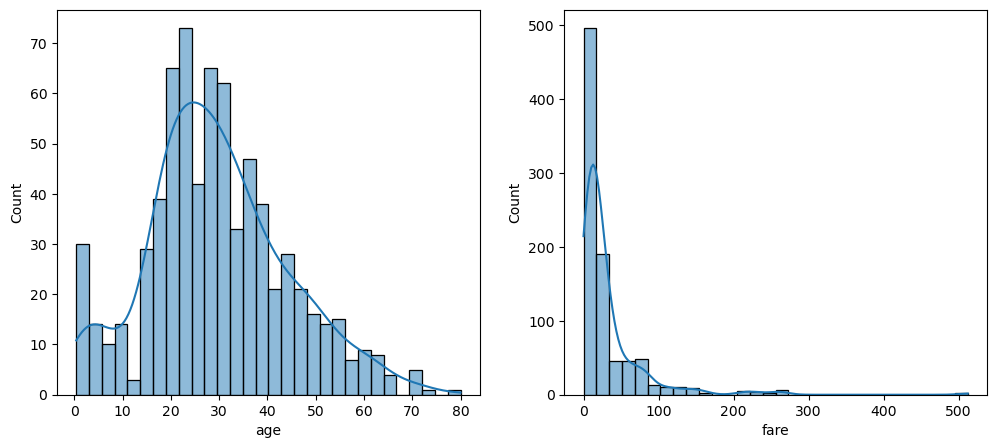

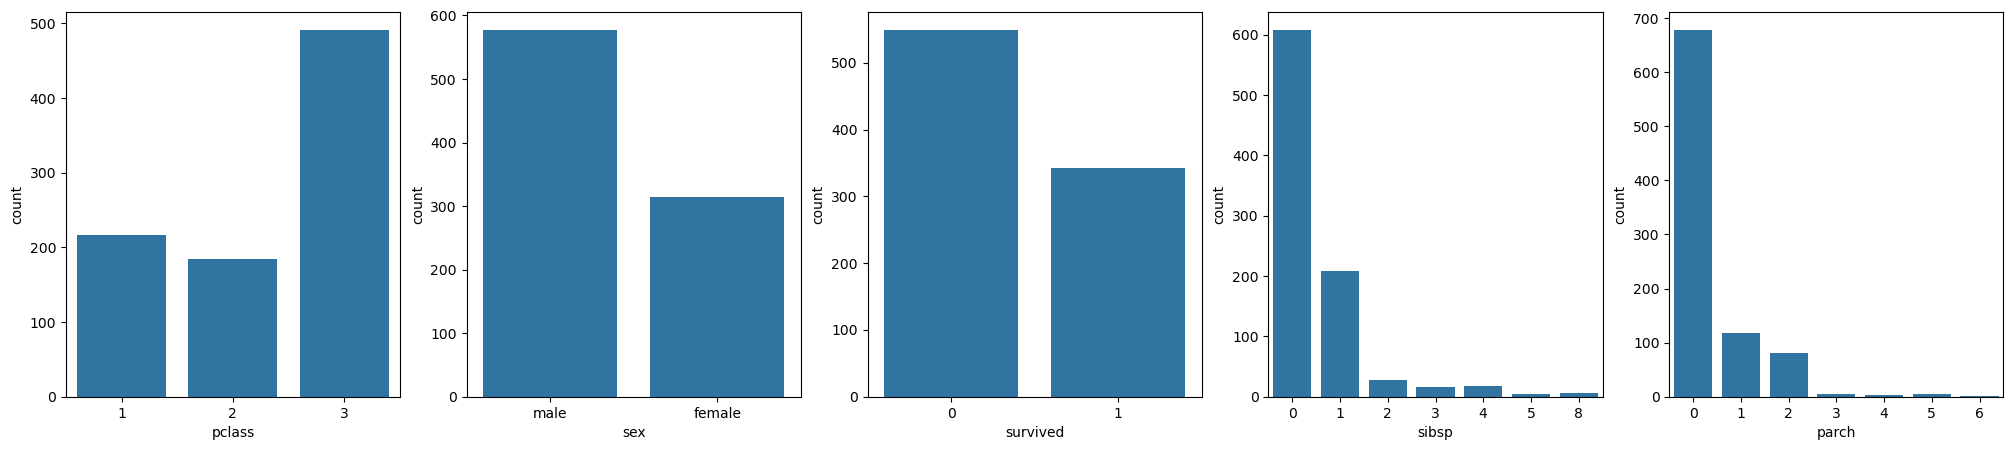

In [4]:
# 3. 데이터 시각화 - 수치형 변수 histplot, 범주형 변수 countplot

# 수치형 변수 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(titanic['age'].dropna(), bins=30, kde=True, ax=axes[0])

sns.histplot(titanic['fare'], bins=30, kde=True, ax=axes[1])

plt.show()

# 범주형 변수 시각화
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
sns.countplot(x='pclass', data=titanic, ax=axes[0])

sns.countplot(x='sex', data=titanic, ax=axes[1])

sns.countplot(x='survived', data=titanic, ax=axes[2])

sns.countplot(x='sibsp', data=titanic, ax=axes[3])

sns.countplot(x='parch', data=titanic, ax=axes[4])

plt.show()

In [5]:
# 7. 성별 변수 변환 (male=0, female=1) -> 히트맵 위해서 미리 진행

titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

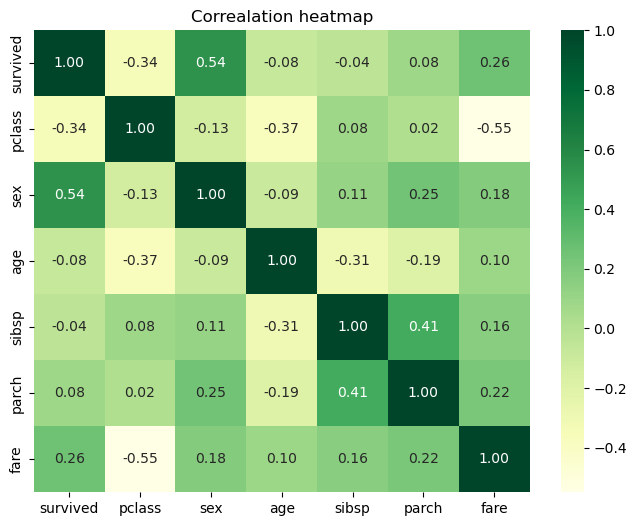

In [6]:
# 4. 변수 간 상관관계 분석 및 시각화

corr_matrix = titanic.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGn', fmt='.2f')
plt.title("Correalation heatmap")
plt.show()

In [7]:
# 5. 'family' 파생 변수 생성 및 기존 변수 제거

titanic['family'] = titanic['sibsp'] + titanic['parch']
titanic.drop(columns=['sibsp', 'parch'], inplace=True)

In [8]:
# 6. 결측치 제거

titanic.dropna(inplace=True)

In [9]:
# 7. 성별 변수 변환 (male=0, female=1) -> 위에서 히트맵 생성 위해 미리 진행함

titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

In [10]:
# 8. 특징(X)과 타겟(y) 분리

X = titanic[['pclass', 'sex', 'age', 'fare', 'family']]
y = titanic['survived']

In [11]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [12]:
# 9. 학습/검증 데이터셋 분리 (학습 80%, 테스트 20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 10. 결정트리 분류기 모델 구축

dt_model = DecisionTreeClassifier()

In [14]:
# 11. 하이퍼파라미터 탐색을 위한 설정

param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [15]:
# 12. 랜덤 서치(RandomizedSearchCV) 실행 (반복수 20)

random_search = RandomizedSearchCV(
    dt_model, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42
)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='accuracy')

In [16]:
# 13. 최적의 모델로 예측 수행

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [17]:
# 14. 최종 모델 정확도 확인

accuracy = accuracy_score(y_test, y_pred)
print(f'최종 모델 정확도: {accuracy:.2f}')

최종 모델 정확도: 0.67
